<a href="https://colab.research.google.com/github/andrybrew/IHT-SEM-1302/blob/main/Practice_Material_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## **Collecting Twitter Data**

In [2]:
# Import the necessary libraries
import tweepy 
import pandas as pd

In [3]:
# Authentication
consumer_key = 'fbqT0mBw9ehG9IhmT2XTSb0Ti'
consumer_secret = 'MJaEGWTR396VqFWZQDmnybqGwbvydCTFFJ9KFLtsMH7vMgfmkr'
access_token = '1323866871288877057-mhauIZAemtLfS4gPxWlyPe6EyGuszv'
access_token_secret = 'fDGMlo6xREFKr4gs3qD6GgoetdFeiFz1DdwuKPJHSsaDL'

In [4]:
# Set up your authentication to Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create an API object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# Collect tweets
tweets = []
for tweet in tweepy.Cursor(api.search, q='resesi', lang = "id").items(100):
    tweets.append(tweet)

In [6]:
# Create Pandas dataframe
df_tweet = pd.DataFrame({'time' : [tweet.created_at for tweet in tweets],
                   'screen_name' : [tweet.user.screen_name for tweet in tweets],
                   'text' : [tweet.text for tweet in tweets],
                   'reply_to_screen_name' : [tweet.in_reply_to_screen_name for tweet in tweets],
                   'location' : [tweet.user.location for tweet in tweets]})

# Show tweets data
df_tweet

,time,screen_name,text,reply_to_screen_name,location
0,2023-02-08 02:22:09,Anggita_lung,RT @Revenge00810455: @jokowi Minta Pemilu 2024...,None,
1,2023-02-08 02:11:38,zenondown,@pengarang_sajak Donatur Wanul Ga punya duit ...,pengarang_sajak,"Jakarta Selatan, DKI Jakarta"
2,2023-02-08 02:07:17,NianHilman,@tanyakanrl Emang mau ditanya apaan? Resesi? \...,tanyakanrl,indonesia
3,2023-02-08 02:02:18,hilmyhilmyx,sebuah implementasi matang dari sumber bahan p...,None,Purrockkerto
4,2023-02-08 01:54:17,pooryyi,RT @Revenge00810455: @jokowi Minta Pemilu 2024...,None,️ー she/her
...,...,...,...,...,...
95,2023-02-07 10:10:21,salmanbiroe,"Nah, kamu bisa pelajarin lebih lengkap nih men...",salmanbiroe,"ÜT: -3.0568297,103.2240984"
96,2023-02-07 10:02:35,salmanbiroe,"Nah, bagi yang ingin menambah penghasilan di k...",salmanbiroe,"ÜT: -3.0568297,103.2240984"
97,2023-02-07 09:56:37,SamNugrohoo,Sore sobat. Kalian tau kan setelah pandemi sek...,None,"Jakarta, Indonesia"
98,2023-02-07 09:51:10,nukliriran,RT @ChatibBasri: Seperti yang saya sampaikan s...,None,


In [7]:
# Save tweets data
df_tweet.to_csv('tweets.csv', index=False)

## **Network Analysis**

In [8]:
# Create edgelist
edgelist = df_tweet[['screen_name', 'reply_to_screen_name']].rename(columns={'screen_name':'source','reply_to_screen_name' : 'target'}).dropna()

# Remove Self Loop
edgelist = edgelist[edgelist['source'] != edgelist['target']]

# Show edgelist
edgelist

,source,target
1,zenondown,pengarang_sajak
2,NianHilman,tanyakanrl
9,infonyachu,akunwangy_
11,Revenge00810455,jokowi
16,megumirahmad,convomf
18,giova_hart,GNarantika
31,BrianJones2022,Rossaline2209
32,AnitaRNew2022,Rossaline2209
41,yourbadbiz,selinting_ganja
43,aryadsan12,PantauManCity


In [9]:
!pip install 'networkx<2.7'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


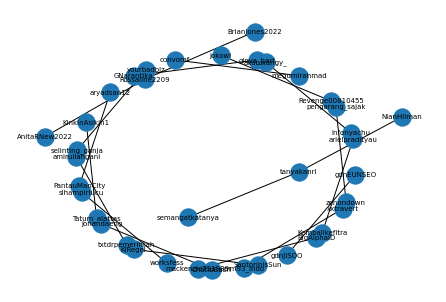

In [10]:
# Import the necessary libraries
import networkx as nx

# Create a graph from the edgelist
G = nx.from_pandas_edgelist(edgelist, source='source', target='target')

# Visualize the graph
nx.draw(G, pos = nx.kamada_kawai_layout(G), font_size = 7, with_labels = True)

### **Network Properties Measurement**

In [11]:
# Calculate number of nodes
num_nodes = G.number_of_nodes()

# Calculate number of edges
num_edges = G.number_of_edges()

# Calculate density
density = nx.density(G)

# Create a dataframe based on the results
network_properties = pd.DataFrame(data= {'num_nodes':[num_nodes], 
                                 'num_edges':[num_edges],
                                 'density':[density]})
# Show network properties
network_properties

,num_nodes,num_edges,density
0,38,20,0.02845


In [12]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweeness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate closeness centrality
eigenvector_centrality = nx.closeness_centrality(G)

# Create a dataframe based on the results
centralities = pd.DataFrame([degree_centrality, betweenness_centrality,
                             closeness_centrality, eigenvector_centrality]).T
centralities.columns = ['degree_centrality', 'betweenness_centrality',
                        'closeness_centrality', 'eigenvector_centrality']

# Show centralities
centralities      

,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
zenondown,0.027027,0.000000,0.027027,0.027027
pengarang_sajak,0.027027,0.000000,0.027027,0.027027
NianHilman,0.027027,0.000000,0.036036,0.036036
tanyakanrl,0.054054,0.001502,0.054054,0.054054
infonyachu,0.027027,0.000000,0.027027,0.027027
akunwangy_,0.027027,0.000000,0.027027,0.027027
Revenge00810455,0.027027,0.000000,0.027027,0.027027
jokowi,0.027027,0.000000,0.027027,0.027027
megumirahmad,0.027027,0.000000,0.027027,0.027027
convomf,0.027027,0.000000,0.027027,0.027027


### **Modularity**

In [13]:
# Import the necessary libraries
from community import community_louvain
import matplotlib.pyplot as plt

In [14]:
# Calculate the modularity
partition = community_louvain.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
partition

{'zenondown': 1,
 'pengarang_sajak': 1,
 'NianHilman': 3,
 'tanyakanrl': 3,
 'infonyachu': 5,
 'akunwangy_': 5,
 'Revenge00810455': 7,
 'jokowi': 7,
 'megumirahmad': 9,
 'convomf': 9,
 'giova_hart': 11,
 'GNarantika': 11,
 'BrianJones2022': 13,
 'Rossaline2209': 13,
 'AnitaRNew2022': 13,
 'yourbadbiz': 15,
 'selinting_ganja': 15,
 'aryadsan12': 6,
 'PantauManCity': 6,
 'KinkinAsikin1': 8,
 'Tatum_alattas': 8,
 'amirullahgani': 10,
 'txtdrpemerintah': 10,
 'sihampirlucu': 12,
 'worksfess': 12,
 'johandaeng': 14,
 'ChatibBasri': 14,
 'KiRegel': 16,
 'SantorinisSun': 16,
 'semangatkatanya': 3,
 'mackenzieTS1989': 17,
 'BigAlphaID': 17,
 'mm93_indo': 0,
 'xxtravert': 0,
 'gdnJISOO': 2,
 'gdnEUNSEO': 2,
 'Kembalikefitra': 4,
 'arielpradityau': 4}

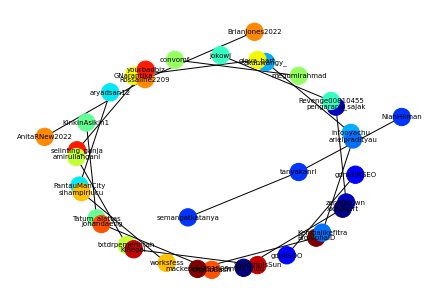

In [15]:
# Visualize the graph
nx.draw(G, pos = nx.kamada_kawai_layout(G), cmap = plt.get_cmap('jet'), node_color = values, font_size = 7, with_labels= True)

## **Collecting News Data**

In [16]:
# Import the necessary libraries
import pandas as pd
import requests

In [17]:
# Specify the News API key and base url
base_url = "http://newsapi.org/v2/"

In [18]:
# Specify the parameters of the data you want to collect
params = {
    'q': 'Coronavirus', #keywords to search for in the news
    'sortBy': 'publishedAt', #sort the news by publication date
    'language': 'en', #language of the news articles
    'apiKey': 'f2b2e3f10bee4668ba146f9bdff912fd' #specify the News API key
}

In [19]:
# Call the API and convert the response to json format
response = requests.get(base_url + 'everything', params=params)
data = response.json()

In [20]:
#create an empty list to store the data
news_data = []

# Loop through each article and extract relevant fields to the list
for article in data['articles']:
    news_data.append({
        'title': article['title'],
        'description': article['description'],
        'content': article['content'],
        'url': article['url'],
        'publishedAt': article['publishedAt'],
        'source': article['source']['name']
    })

# Convert the list of dictionaries to a dataframe
df_news = pd.DataFrame(news_data)

# Show news data
df_news

,title,description,content,url,publishedAt,source
0,Australia to expand rollout of fifth COVID-19 ...,SYDNEY: Australia will roll out a fifth dose o...,SYDNEY: Australia will roll out a fifth dose o...,https://www.channelnewsasia.com/world/australi...,2023-02-08T02:03:00Z,CNA
1,Biden administration tells Supreme Court Title...,The Biden administration told the Supreme Cour...,The Biden administration told the Supreme Cour...,https://www.cnn.com/2023/02/07/politics/title-...,2023-02-08T01:27:43Z,CNN
2,Australia to expand rollout of fifth COVID vac...,SYDNEY (Reuters) - Australia will roll out a...,Only severely immuno-compromised people had be...,https://www.fxempire.com/news/article/australi...,2023-02-08T01:23:12Z,FX Empire
3,Australia to expand rollout of fifth COVID vac...,Australia will roll out a fifth dose of COVID-...,"SYDNEY, Feb 8 (Reuters) - Australia will roll ...",https://www.reuters.com/business/healthcare-ph...,2023-02-08T01:04:29Z,Reuters
4,DeSantis touts Florida as Republican edge over...,"In a tweet on Tuesday afternoon, Governor Ron ...",Florida Governor Ron DeSantis proudly shared t...,https://www.foxnews.com/politics/desantis-tout...,2023-02-08T00:56:13Z,Fox News
...,...,...,...,...,...,...
95,Companies Pledge Millions in Fed Effort to Ste...,Nearly 50 businesses and nonprofits – includin...,New You can now listen to Insurance Journal ar...,https://www.insurancejournal.com/news/national...,2023-02-07T16:53:48Z,Insurance Journal
96,First Sweeping Federal Gun Crime Report in 20 ...,The most expansive federal report in over two ...,New You can now listen to Insurance Journal ar...,https://www.insurancejournal.com/news/national...,2023-02-07T16:44:35Z,Insurance Journal
97,Biden's Top COVID Adviser Says Trump Deserved ...,The Biden administration has previously receiv...,President Joe Biden's top COVID adviser thinks...,https://www.newsweek.com/biden-top-covid-advis...,2023-02-07T16:42:39Z,Newsweek
98,The sick reality: Drugs advertised on TV most ...,Johns Hopkins University researchers found tha...,Pharmaceutical giants funneled huge sums of mo...,https://www.dailymail.co.uk/health/article-117...,2023-02-07T16:35:25Z,Daily Mail


In [21]:
# Save news data
df_news.to_csv("news.csv")

## **Sentiment Analysis: VADER (English)**

In [22]:
# Import the necessary libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [23]:
# Download the corpus
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [24]:
# Create a vader sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Create a list of sentences
sentences = df_news['title']

# Calculate the compound sentiment score of each sentence
scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


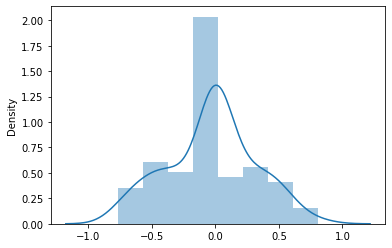

In [25]:
# Import the necessary libraries
import seaborn as sns

# Visualize the compound sentiment using seaborn
sns.distplot(x=scores)

## **Topic Modeling**

In [26]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6666fc07d57b859c900df10cd9816a3d6e48eea694e3182e6a400ed8ed2ebb77
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=2af2c1d7f586c6bac675d79deba16eedbd6b23c0f7cdcd2366ed3b99c94556e7
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [27]:
import string
import gensim
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
import pyLDAvis.gensim_models

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [28]:
# Select News Title
news_title = df_news['title']

# Tokenize
tokenized_text = [d.lower().split() for d in news_title]

# Remove punctuation
punctuation = string.punctuation
tokenized_text = [[word for word in doc if word not in punctuation] for doc in tokenized_text]

# Lemmatization
lemmatizer = WordNetLemmatizer()
tokenized_text = [[lemmatizer.lemmatize(word) for word in doc] for doc in tokenized_text]

# Remove stopwords
stop_words = stopwords.words('english')
tokenized_text = [[word for word in doc if word not in stop_words] for doc in tokenized_text]

# Create dictionary
dictionary = corpora.Dictionary(tokenized_text)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_text]

In [29]:
# Train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=3,
                                           passes = 100, 
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [30]:
# Enable Notebook 
pyLDAvis.enable_notebook()

# Visualize
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.019747 -0.115900       1        1  35.717874
2     -0.113334  0.041359       2        1  33.460766
0      0.093587  0.074541       3        1  30.821360, topic_info=        Term      Freq     Total Category  logprob  loglift
76      2022  7.000000  7.000000  Default  30.0000  30.0000
105   record  4.000000  4.000000  Default  29.0000  29.0000
206   result  4.000000  4.000000  Default  28.0000  28.0000
205  quarter  4.000000  4.000000  Default  27.0000  27.0000
449   global  5.000000  5.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
267    video  1.408355  2.428224   Topic3  -5.3222   0.6322
163      gop  1.407828  2.428232   Topic3  -5.3226   0.6318
396        3  1.407806  2.441533   Topic3  -5.3226   0.6264
5       shot  1.407062  3.692048   Topic3  -5.3231   0.2123
38    report  1.405405  6.125687   Topic3  -5.3243  -0.2952

[158 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
439       3  0.550526   $1.3
479       2  0.544472  $88.6
217       2  0.544472     11
241       3  0.827063     12
76        2  0.953221   2022
...     ...       ...    ...
159       3  0.410085  world
146       1  0.203559   year
146       2  0.610677   year
146       3  0.203559   year
486       2  0.544472   zion

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

## **Text Network Analysis**

In [31]:
# Create dataframe
df_tna = pd.DataFrame(df_news['title'].str.lower().str.replace(r'[^\w\s]',''))
df_tna

<ipython-input-31-59a026b20692>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tna = pd.DataFrame(df_news['title'].str.lower().str.replace(r'[^\w\s]',''))


,title
0,australia to expand rollout of fifth covid19 v...
1,biden administration tells supreme court title...
2,australia to expand rollout of fifth covid vac...
3,australia to expand rollout of fifth covid vac...
4,desantis touts florida as republican edge over...
...,...
95,companies pledge millions in fed effort to ste...
96,first sweeping federal gun crime report in 20 ...
97,bidens top covid adviser says trump deserved m...
98,the sick reality drugs advertised on tv most h...


In [32]:
# Create empty graph
G = nx.Graph()

In [33]:
# For each row in dataframe
for index, row in df_tna.iterrows():
    
    # Split tittle into words
    words = row['title'].split(' ')
    
    # Add relationships between words
    for w1 in words:
        for w2 in words:
            if w1 != w2:
                G.add_edge(w1,w2)

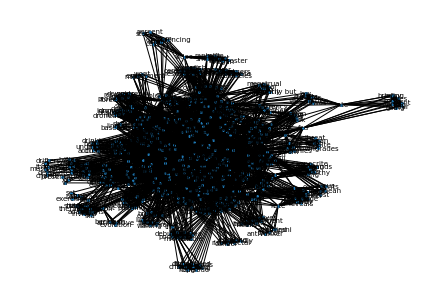

In [34]:
# Visualize the graph
nx.draw(G, font_size = 7, with_labels = True)

## **Sentiment Analysis: IndoBERT**

In [35]:
# Install Huggingface Transformers
! pip install  huggingface transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 89.2 MB/s eta 0:00:00


In [36]:
# import necessary libraries 
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [37]:
# Download Pretrained Model
pretrained= "mdhugol/indonesia-bert-sentiment-classification"

# Set Model and Tokenizer
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Create sentiment classifier using huggingface pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [38]:
# Get sentiment label for each row in dataframe 
df_tweet['sentiment'] = df_tweet['text'].apply(lambda x: sentiment_analysis(x)[0]['label'])


In [39]:
# Set Label
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Replace the values in the sentiment column
df_tweet['sentiment'] = df_tweet['sentiment'].replace(label_index)

# Show Tweet with sentiment
df_tweet

,time,screen_name,text,reply_to_screen_name,location,sentiment
0,2023-02-08 02:22:09,Anggita_lung,RT @Revenge00810455: @jokowi Minta Pemilu 2024...,None,,neutral
1,2023-02-08 02:11:38,zenondown,@pengarang_sajak Donatur Wanul Ga punya duit ...,pengarang_sajak,"Jakarta Selatan, DKI Jakarta",negative
2,2023-02-08 02:07:17,NianHilman,@tanyakanrl Emang mau ditanya apaan? Resesi? \...,tanyakanrl,indonesia,neutral
3,2023-02-08 02:02:18,hilmyhilmyx,sebuah implementasi matang dari sumber bahan p...,None,Purrockkerto,neutral
4,2023-02-08 01:54:17,pooryyi,RT @Revenge00810455: @jokowi Minta Pemilu 2024...,None,️ー she/her,neutral
...,...,...,...,...,...,...
95,2023-02-07 10:10:21,salmanbiroe,"Nah, kamu bisa pelajarin lebih lengkap nih men...",salmanbiroe,"ÜT: -3.0568297,103.2240984",neutral
96,2023-02-07 10:02:35,salmanbiroe,"Nah, bagi yang ingin menambah penghasilan di k...",salmanbiroe,"ÜT: -3.0568297,103.2240984",neutral
97,2023-02-07 09:56:37,SamNugrohoo,Sore sobat. Kalian tau kan setelah pandemi sek...,None,"Jakarta, Indonesia",neutral
98,2023-02-07 09:51:10,nukliriran,RT @ChatibBasri: Seperti yang saya sampaikan s...,None,,neutral


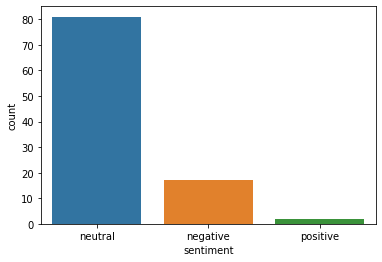

In [40]:
# Visualise the sentiment distribution
sns.countplot(x ='sentiment', data = df_tweet)